In [3]:
from keras.layers import Dense, Activation, Input
from keras.models import Model, load_model
from keras.optimizers import Adam
import keras.backend as K
import numpy as np

In [5]:
class Agent(object):
    def __init__(self, alpha, gamma=0.99, n_actions=4, ip_dims=128, name='policy_grad_keras.h5'):
        self.gamma = gamma
        self.lr = alpha
        self.G = 0
        self.ip_dims = ip_dims
        self.n_actions = n_actions
        
        self.state_memory = []
        self.action_memory = []
        self.reword_memory = []
        
        self.policy, self.predict = self.policy_NN()
        
        self.action_space = [i for i in range(n_actions)]
        self.model_name  = name
    
    
    def policy_NN(self):
        ip = Input(shape=(self.ip_dims,))
        advantage = Input(shape=[1])
        dense_1 = Dense(16, activation='relu')(ip)
        dense_2 = Dense(16, activation='relu')(dense_1)
        probs = Dense(self.n_actions, activation='softmax')(dense_2)
        
        def custom_loss(y_true, y_predict):
            out = K.clip(y_predict, 1e-8, 1-1e-8)
            log_lik = y_true*K.log(out)
            
            return K.sum(-log_lik*advantage)
        
        policy = Model(inputs=[ip, advantage], outputs=[probs])
        policy.compile(optimizer=Adam(lr=self.lr), loss=custom_loss)
        predict = Model(inputs=[ip], outputs=[probs])
        
        return policy, predict
    
    def choose_action(self, observations):
        state = observations[np.newaxis, :]
        prob = self.predict.predict(state)[0]
        action = np.random.choice(self.action_space, p=prob)
        return action
    
    def transition_state_matrix(self, observation, action, reword):
        self.state_memory.append(observation)
        self.action_memory.append(action)
        self.reword_memory.append(reword)
        
    
    def learn(self):
        state_memory = np.array(self.state_memory)
        action_memory = np.array(self.action_memory)
        reword_memory = np.array(self.reword_memory)
        
        actions = np.zeros([len(action_memory), self.n_actions])
        actions[np.arange(len(action_memory)), action_memory] = 1
        
        G = np.zeros_like(reword_memory)
        
        for t in range(len(reword_memory)):
            G_sum = 0
            discount = 1
            
            for k in range(t, len(reword_memory)):
                
                G_sum += reword_memory[k]*discount
                discount *= self.gamma
            G[t] = G_sum
        
        mean = np.mean(G)
        std = np.std(G) if np.std(G) > 0 else 1
        
        self.G = (G - mean) / std
        
        cost = self.policy.train_on_batch([state_memory, self.G], actions)
        
        self.state_memory = []
        self.action_memory = []
        self.reword_memory = []
        
        return cost
        

C:\Users\Debanik Roy\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


episode:  0 score: -202.1 average score -202.1
episode:  1 score: -55.3 average score -128.7
episode:  2 score: -41.7 average score -99.7
episode:  3 score: -108.3 average score -101.9
episode:  4 score: -131.9 average score -107.9
episode:  5 score: -138.3 average score -112.9
episode:  6 score: -104.1 average score -111.7
episode:  7 score: -207.7 average score -123.7
episode:  8 score: -166.4 average score -128.4
episode:  9 score: -166.6 average score -132.2
episode:  10 score: -147.0 average score -133.6
episode:  11 score: -119.4 average score -132.4
episode:  12 score: -139.5 average score -132.9
episode:  13 score: -120.0 average score -132.0
episode:  14 score: -92.9 average score -129.4
episode:  15 score: -116.2 average score -128.6
episode:  16 score: -208.0 average score -133.3
episode:  17 score: -153.3 average score -134.4
episode:  18 score: -200.7 average score -137.9
episode:  19 score: -139.6 average score -137.9
episode:  20 score: -337.0 average score -147.4
episod

episode:  173 score: -165.6 average score -138.6
episode:  174 score: -123.8 average score -139.7
episode:  175 score: -69.2 average score -139.1
episode:  176 score: -97.6 average score -137.2
episode:  177 score: -99.0 average score -137.7
episode:  178 score: -122.4 average score -137.8
episode:  179 score: -107.1 average score -137.6
episode:  180 score: -210.1 average score -138.4
episode:  181 score: -65.0 average score -138.0
episode:  182 score: -102.7 average score -137.8
episode:  183 score: -95.9 average score -137.5
episode:  184 score: -120.6 average score -134.9
episode:  185 score: -114.4 average score -134.6
episode:  186 score: -145.2 average score -135.1
episode:  187 score: -135.3 average score -133.9
episode:  188 score: -116.6 average score -134.0
episode:  189 score: -111.5 average score -132.8
episode:  190 score: -140.5 average score -133.2
episode:  191 score: -73.3 average score -132.8
episode:  192 score: -148.4 average score -133.3
episode:  193 score: -219.

episode:  344 score: -60.4 average score -122.1
episode:  345 score: -82.0 average score -122.3
episode:  346 score: -85.8 average score -122.3
episode:  347 score: -99.2 average score -122.2
episode:  348 score: -67.3 average score -122.0
episode:  349 score: -134.8 average score -122.5
episode:  350 score: -120.6 average score -122.8
episode:  351 score: -40.9 average score -122.1
episode:  352 score: -124.5 average score -120.6
episode:  353 score: -83.8 average score -120.3
episode:  354 score: -104.1 average score -120.1
episode:  355 score: -129.8 average score -120.6
episode:  356 score: -67.3 average score -120.3
episode:  357 score: -63.1 average score -119.8
episode:  358 score: -96.2 average score -119.7
episode:  359 score: -66.3 average score -118.9
episode:  360 score: -74.8 average score -117.8
episode:  361 score: -234.0 average score -119.4
episode:  362 score: -170.0 average score -120.2
episode:  363 score: -86.8 average score -119.8
episode:  364 score: -176.7 avera

episode:  514 score: -249.7 average score -123.2
episode:  515 score: -145.1 average score -124.1
episode:  516 score: -77.2 average score -123.4
episode:  517 score: -100.5 average score -122.0
episode:  518 score: -65.5 average score -121.6
episode:  519 score: -20.6 average score -120.9
episode:  520 score: -78.7 average score -121.0
episode:  521 score: -170.3 average score -121.4
episode:  522 score: -180.1 average score -122.3
episode:  523 score: -110.5 average score -122.8
episode:  524 score: -59.2 average score -122.3
episode:  525 score: -57.7 average score -122.3
episode:  526 score: -91.2 average score -121.6
episode:  527 score: -243.4 average score -122.7
episode:  528 score: -120.2 average score -122.3
episode:  529 score: -205.0 average score -122.7
episode:  530 score: -244.9 average score -124.3
episode:  531 score: -118.8 average score -124.3
episode:  532 score: -78.0 average score -124.0
episode:  533 score: -265.5 average score -125.5
episode:  534 score: -100.6 

episode:  686 score: -239.7 average score -107.0
episode:  687 score: -139.2 average score -108.2
episode:  688 score: -39.8 average score -107.9
episode:  689 score: -112.5 average score -108.4
episode:  690 score: -125.5 average score -106.0
episode:  691 score: -234.5 average score -107.3
episode:  692 score: -45.1 average score -107.0
episode:  693 score: -95.6 average score -106.6
episode:  694 score: -110.6 average score -106.4
episode:  695 score: -264.8 average score -108.1
episode:  696 score: -81.6 average score -107.9
episode:  697 score: -172.0 average score -108.2
episode:  698 score: -86.0 average score -107.9
episode:  699 score: -147.6 average score -108.5
episode:  700 score: -75.9 average score -108.2
episode:  701 score: -85.5 average score -108.6
episode:  702 score: -53.6 average score -108.8
episode:  703 score: -89.4 average score -109.3
episode:  704 score: -116.3 average score -109.8
episode:  705 score: -84.2 average score -110.5
episode:  706 score: -94.1 ave

episode:  857 score: -118.7 average score -116.6
episode:  858 score: -103.0 average score -114.2
episode:  859 score: -37.8 average score -112.6
episode:  860 score: -172.2 average score -113.6
episode:  861 score: -45.0 average score -113.5
episode:  862 score: -89.7 average score -113.9
episode:  863 score: -134.3 average score -113.4
episode:  864 score: -34.0 average score -111.4
episode:  865 score: -77.1 average score -112.0
episode:  866 score: -52.9 average score -110.0
episode:  867 score: -121.7 average score -110.6
episode:  868 score: -70.0 average score -110.8
episode:  869 score: -177.7 average score -109.6
episode:  870 score: -87.4 average score -109.6
episode:  871 score: -209.6 average score -110.9
episode:  872 score: -58.8 average score -109.4
episode:  873 score: -44.4 average score -107.6
episode:  874 score: -236.3 average score -109.3
episode:  875 score: -69.9 average score -109.4
episode:  876 score: -120.4 average score -110.3
episode:  877 score: -146.3 ave

episode:  1029 score: -63.1 average score -78.2
episode:  1030 score: -120.2 average score -77.2
episode:  1031 score: -49.0 average score -75.8
episode:  1032 score: -167.0 average score -76.1
episode:  1033 score: -105.2 average score -74.5
episode:  1034 score: -150.1 average score -75.8
episode:  1035 score: -73.2 average score -75.8
episode:  1036 score: -4.1 average score -74.8
episode:  1037 score: -111.3 average score -75.5
episode:  1038 score: -126.0 average score -76.4
episode:  1039 score: -76.0 average score -76.6
episode:  1040 score: -9.6 average score -75.8
episode:  1041 score: -159.8 average score -76.8
episode:  1042 score: -55.2 average score -75.3
episode:  1043 score: -27.6 average score -75.3
episode:  1044 score: -131.4 average score -76.3
episode:  1045 score: -43.5 average score -76.2
episode:  1046 score: -154.7 average score -77.7
episode:  1047 score: -71.1 average score -78.0
episode:  1048 score: -38.2 average score -76.8
episode:  1049 score: -62.5 avera

episode:  1199 score: -62.1 average score -81.4
episode:  1200 score: -16.7 average score -81.2
episode:  1201 score: -10.2 average score -80.2
episode:  1202 score: -65.2 average score -80.2
episode:  1203 score: -46.1 average score -80.1
episode:  1204 score: -69.9 average score -79.6
episode:  1205 score: -43.5 average score -79.3
episode:  1206 score: -38.7 average score -78.9
episode:  1207 score: -27.0 average score -78.8
episode:  1208 score: -64.6 average score -79.7
episode:  1209 score: -23.8 average score -79.1
episode:  1210 score: -65.5 average score -79.0
episode:  1211 score: 19.8 average score -78.1
episode:  1212 score: -100.0 average score -78.6
episode:  1213 score: -53.4 average score -77.7
episode:  1214 score: -10.0 average score -77.5
episode:  1215 score: -24.2 average score -76.7
episode:  1216 score: -27.9 average score -76.2
episode:  1217 score: -58.5 average score -76.2
episode:  1218 score: -89.8 average score -74.9
episode:  1219 score: -171.5 average sco

episode:  1371 score: -35.6 average score -60.7
episode:  1372 score: -86.1 average score -61.1
episode:  1373 score: -14.0 average score -59.9
episode:  1374 score: 7.9 average score -59.3
episode:  1375 score: -10.6 average score -59.7
episode:  1376 score: -83.1 average score -57.9
episode:  1377 score: -40.7 average score -57.5
episode:  1378 score: -30.8 average score -56.6
episode:  1379 score: -43.2 average score -56.5
episode:  1380 score: -119.3 average score -57.1
episode:  1381 score: 50.6 average score -56.2
episode:  1382 score: -50.2 average score -56.1
episode:  1383 score: -41.6 average score -56.4
episode:  1384 score: -4.5 average score -55.7
episode:  1385 score: -64.9 average score -55.9
episode:  1386 score: -53.5 average score -55.9
episode:  1387 score: -4.4 average score -55.8
episode:  1388 score: -3.5 average score -55.7
episode:  1389 score: -26.3 average score -54.8
episode:  1390 score: -113.6 average score -54.7
episode:  1391 score: 11.7 average score -52

episode:  1543 score: -121.7 average score -71.3
episode:  1544 score: -350.0 average score -74.9
episode:  1545 score: 63.6 average score -74.1
episode:  1546 score: 7.0 average score -73.8
episode:  1547 score: -133.8 average score -74.9
episode:  1548 score: -268.7 average score -77.5
episode:  1549 score: 6.9 average score -77.5
episode:  1550 score: 10.5 average score -77.0
episode:  1551 score: 2.4 average score -76.8
episode:  1552 score: 6.6 average score -76.5
episode:  1553 score: -307.1 average score -78.5
episode:  1554 score: -210.7 average score -80.3
episode:  1555 score: -77.1 average score -80.5
episode:  1556 score: -19.0 average score -80.6
episode:  1557 score: 39.3 average score -80.1
episode:  1558 score: -33.7 average score -80.5
episode:  1559 score: 15.1 average score -79.8
episode:  1560 score: -9.2 average score -80.1
episode:  1561 score: -359.5 average score -84.0
episode:  1562 score: -17.9 average score -83.3
episode:  1563 score: -82.2 average score -83.

episode:  1715 score: 5.3 average score -40.6
episode:  1716 score: -135.6 average score -40.3
episode:  1717 score: -236.3 average score -43.0
episode:  1718 score: -22.0 average score -42.2
episode:  1719 score: -175.2 average score -43.6
episode:  1720 score: -184.7 average score -45.0
episode:  1721 score: 9.1 average score -45.4
episode:  1722 score: 74.2 average score -44.5
episode:  1723 score: -146.8 average score -46.1
episode:  1724 score: 9.8 average score -45.7
episode:  1725 score: 26.0 average score -45.0
episode:  1726 score: -44.4 average score -45.8
episode:  1727 score: -52.9 average score -46.5
episode:  1728 score: 29.0 average score -46.4
episode:  1729 score: -6.4 average score -46.4
episode:  1730 score: -20.3 average score -46.4
episode:  1731 score: -52.0 average score -46.0
episode:  1732 score: -61.8 average score -46.5
episode:  1733 score: -91.8 average score -47.5
episode:  1734 score: -215.9 average score -49.3
episode:  1735 score: -49.5 average score -4

episode:  1887 score: -95.3 average score -45.6
episode:  1888 score: -80.6 average score -45.8
episode:  1889 score: -79.9 average score -46.5
episode:  1890 score: -128.6 average score -48.0
episode:  1891 score: -65.6 average score -49.3
episode:  1892 score: 18.4 average score -49.3
episode:  1893 score: 14.1 average score -48.8
episode:  1894 score: 3.9 average score -48.6
episode:  1895 score: 7.3 average score -48.7
episode:  1896 score: 45.8 average score -48.4
episode:  1897 score: 54.4 average score -47.8
episode:  1898 score: -78.4 average score -48.3
episode:  1899 score: -61.1 average score -48.5
episode:  1900 score: 31.2 average score -48.3
episode:  1901 score: 12.4 average score -48.1
episode:  1902 score: 41.8 average score -47.4
episode:  1903 score: -25.6 average score -47.5
episode:  1904 score: -79.7 average score -45.4
episode:  1905 score: -17.7 average score -45.4
episode:  1906 score: -81.4 average score -46.5
episode:  1907 score: 30.0 average score -46.1
epi

episode:  2060 score: 38.5 average score -26.4
episode:  2061 score: -23.7 average score -24.8
episode:  2062 score: 59.1 average score -25.0
episode:  2063 score: -63.3 average score -25.6
episode:  2064 score: -15.9 average score -25.1
episode:  2065 score: 16.2 average score -25.4
episode:  2066 score: 87.4 average score -24.8
episode:  2067 score: 47.0 average score -24.6
episode:  2068 score: -3.2 average score -24.7
episode:  2069 score: 38.7 average score -24.7
episode:  2070 score: -62.1 average score -25.0
episode:  2071 score: 11.7 average score -23.8
episode:  2072 score: -0.7 average score -21.9
episode:  2073 score: 3.7 average score -22.0
episode:  2074 score: 5.6 average score -20.7
episode:  2075 score: 19.9 average score -19.9
episode:  2076 score: 19.7 average score -19.3
episode:  2077 score: -6.9 average score -19.2
episode:  2078 score: -69.0 average score -20.3
episode:  2079 score: -60.5 average score -21.6
episode:  2080 score: 36.1 average score -20.6
episode: 

episode:  2235 score: -24.1 average score 3.6
episode:  2236 score: 21.2 average score 3.6
episode:  2237 score: 61.2 average score 4.4
episode:  2238 score: -0.5 average score 3.7
episode:  2239 score: 24.2 average score 3.4
episode:  2240 score: -51.8 average score 2.5
episode:  2241 score: 105.2 average score 3.8
episode:  2242 score: -7.4 average score 4.0
episode:  2243 score: -6.2 average score 4.4
episode:  2244 score: -33.4 average score 5.9
episode:  2245 score: -29.7 average score 5.7
episode:  2246 score: 37.6 average score 5.8
episode:  2247 score: -6.1 average score 5.6
episode:  2248 score: -52.9 average score 4.8
episode:  2249 score: -52.2 average score 3.3
episode:  2250 score: 98.3 average score 3.9
episode:  2251 score: -259.8 average score 1.1
episode:  2252 score: 91.1 average score 2.1
episode:  2253 score: 15.2 average score 2.1
episode:  2254 score: -26.0 average score 2.2
episode:  2255 score: -3.4 average score 1.8
episode:  2256 score: 88.0 average score 2.6


episode:  2416 score: -139.0 average score 9.9
episode:  2417 score: -71.4 average score 8.5
episode:  2418 score: -47.2 average score 7.5
episode:  2419 score: 11.9 average score 8.7
episode:  2420 score: -54.2 average score 7.8
episode:  2421 score: 18.2 average score 7.3
episode:  2422 score: -21.4 average score 6.8
episode:  2423 score: -49.4 average score 5.9
episode:  2424 score: 32.6 average score 6.0
episode:  2425 score: 121.8 average score 6.8
episode:  2426 score: -9.5 average score 6.1
episode:  2427 score: 26.9 average score 6.0
episode:  2428 score: 69.5 average score 5.8
episode:  2429 score: 11.2 average score 5.5
episode:  2430 score: 135.8 average score 6.9
episode:  2431 score: -49.7 average score 6.7
episode:  2432 score: -1.4 average score 7.1
episode:  2433 score: -35.7 average score 6.4
episode:  2434 score: 34.5 average score 8.2
episode:  2435 score: 65.7 average score 9.1
episode:  2436 score: 106.2 average score 8.9
episode:  2437 score: -22.1 average score 9

episode:  2593 score: -149.7 average score 21.7
episode:  2594 score: 27.7 average score 20.6
episode:  2595 score: 23.7 average score 20.2
episode:  2596 score: 7.5 average score 22.3
episode:  2597 score: 44.4 average score 22.9
episode:  2598 score: 117.8 average score 24.1
episode:  2599 score: 35.0 average score 23.5
episode:  2600 score: 39.1 average score 23.5
episode:  2601 score: -9.0 average score 22.9
episode:  2602 score: 4.1 average score 22.1
episode:  2603 score: 39.3 average score 21.2
episode:  2604 score: -158.2 average score 19.3
episode:  2605 score: 87.5 average score 20.6
episode:  2606 score: 15.1 average score 20.1
episode:  2607 score: 96.6 average score 19.7
episode:  2608 score: 8.4 average score 19.4
episode:  2609 score: -110.2 average score 18.2
episode:  2610 score: -52.2 average score 17.4
episode:  2611 score: 151.8 average score 18.4
episode:  2612 score: 137.1 average score 21.3
episode:  2613 score: 17.9 average score 21.5
episode:  2614 score: 9.3 a

episode:  2770 score: 101.5 average score 51.2
episode:  2771 score: 8.8 average score 50.7
episode:  2772 score: -27.7 average score 50.2
episode:  2773 score: 6.1 average score 48.8
episode:  2774 score: 3.9 average score 47.8
episode:  2775 score: 26.8 average score 47.0
episode:  2776 score: 97.1 average score 46.5
episode:  2777 score: 132.2 average score 47.9
episode:  2778 score: 69.2 average score 48.2
episode:  2779 score: 11.7 average score 48.6
episode:  2780 score: 122.8 average score 49.2
episode:  2781 score: 106.9 average score 50.2
episode:  2782 score: 170.5 average score 51.0
episode:  2783 score: 113.3 average score 51.0
episode:  2784 score: 84.7 average score 51.2
episode:  2785 score: 133.6 average score 51.6
episode:  2786 score: 81.7 average score 52.8
episode:  2787 score: 149.2 average score 54.2
episode:  2788 score: -1.6 average score 54.2
episode:  2789 score: 80.2 average score 54.5
episode:  2790 score: 107.9 average score 55.3
episode:  2791 score: -10.8

episode:  2947 score: 77.0 average score 55.6
episode:  2948 score: 84.3 average score 56.0
episode:  2949 score: 89.6 average score 56.0
episode:  2950 score: 30.6 average score 55.4
episode:  2951 score: 8.8 average score 54.1
episode:  2952 score: 124.1 average score 55.0
episode:  2953 score: 56.4 average score 55.2
episode:  2954 score: 128.1 average score 56.4
episode:  2955 score: 33.0 average score 58.7
episode:  2956 score: 138.0 average score 60.0
episode:  2957 score: 16.6 average score 59.6
episode:  2958 score: -128.4 average score 58.9
episode:  2959 score: -0.8 average score 58.8
episode:  2960 score: 11.2 average score 57.6
episode:  2961 score: -81.3 average score 57.0
episode:  2962 score: -45.6 average score 55.4
episode:  2963 score: 16.8 average score 54.2
episode:  2964 score: 134.4 average score 55.3
episode:  2965 score: 0.5 average score 55.2
episode:  2966 score: -37.3 average score 54.6
episode:  2967 score: 130.5 average score 54.8
episode:  2968 score: -21.

episode:  3124 score: 91.1 average score 76.3
episode:  3125 score: -30.8 average score 75.2
episode:  3126 score: -37.4 average score 73.6
episode:  3127 score: 149.3 average score 74.0
episode:  3128 score: 46.0 average score 73.1
episode:  3129 score: 151.9 average score 73.8
episode:  3130 score: 118.7 average score 73.9
episode:  3131 score: 36.6 average score 74.0
episode:  3132 score: -71.7 average score 72.2
episode:  3133 score: -38.9 average score 74.0
episode:  3134 score: 89.4 average score 73.5
episode:  3135 score: 107.2 average score 73.6
episode:  3136 score: 11.8 average score 72.0
episode:  3137 score: 70.4 average score 73.7
episode:  3138 score: 120.7 average score 73.5
episode:  3139 score: 125.5 average score 74.1
episode:  3140 score: 149.3 average score 74.0
episode:  3141 score: 59.6 average score 73.3
episode:  3142 score: 38.3 average score 72.3
episode:  3143 score: 23.5 average score 71.5
episode:  3144 score: 45.4 average score 70.7
episode:  3145 score: 4

episode:  3301 score: 99.5 average score 78.6
episode:  3302 score: 93.4 average score 79.7
episode:  3303 score: 94.1 average score 79.2
episode:  3304 score: 130.7 average score 79.5
episode:  3305 score: -142.1 average score 76.9
episode:  3306 score: 95.2 average score 76.5
episode:  3307 score: 97.5 average score 77.5
episode:  3308 score: 128.6 average score 77.1
episode:  3309 score: 149.0 average score 78.4
episode:  3310 score: 140.2 average score 78.8
episode:  3311 score: 109.4 average score 79.8
episode:  3312 score: 41.7 average score 80.4
episode:  3313 score: 146.9 average score 81.2
episode:  3314 score: 135.1 average score 81.6
episode:  3315 score: 22.9 average score 80.2
episode:  3316 score: 117.8 average score 79.8
episode:  3317 score: 80.5 average score 79.4
episode:  3318 score: 105.1 average score 80.4
episode:  3319 score: 93.8 average score 81.1
episode:  3320 score: 143.5 average score 81.4
episode:  3321 score: 116.4 average score 81.9
episode:  3322 score:

episode:  3478 score: 127.7 average score 83.3
episode:  3479 score: -43.1 average score 82.1
episode:  3480 score: 105.8 average score 83.4
episode:  3481 score: 68.7 average score 83.0
episode:  3482 score: 124.6 average score 83.3
episode:  3483 score: 95.8 average score 83.8
episode:  3484 score: -21.9 average score 82.6
episode:  3485 score: 12.6 average score 81.6
episode:  3486 score: 60.9 average score 82.2
episode:  3487 score: 55.3 average score 81.8
episode:  3488 score: 100.8 average score 82.6
episode:  3489 score: 27.0 average score 81.5
episode:  3490 score: 98.9 average score 81.6
episode:  3491 score: -19.9 average score 81.0
episode:  3492 score: 84.6 average score 81.5
episode:  3493 score: 137.4 average score 81.2
episode:  3494 score: 133.4 average score 81.3
episode:  3495 score: 137.1 average score 81.7
episode:  3496 score: -12.5 average score 81.5
episode:  3497 score: 130.4 average score 82.0
episode:  3498 score: -87.3 average score 81.8
episode:  3499 score:

episode:  3654 score: 128.6 average score 73.4
episode:  3655 score: -1.7 average score 72.6
episode:  3656 score: 116.4 average score 73.3
episode:  3657 score: 143.7 average score 73.4
episode:  3658 score: 69.0 average score 74.1
episode:  3659 score: 155.0 average score 74.3
episode:  3660 score: 134.4 average score 74.3
episode:  3661 score: 93.5 average score 75.0
episode:  3662 score: 99.0 average score 75.0
episode:  3663 score: 123.6 average score 75.9
episode:  3664 score: 2.1 average score 74.4
episode:  3665 score: 61.9 average score 73.7
episode:  3666 score: 167.4 average score 74.2
episode:  3667 score: 148.5 average score 74.6
episode:  3668 score: 116.4 average score 75.4
episode:  3669 score: 151.4 average score 76.8
episode:  3670 score: 94.6 average score 76.4
episode:  3671 score: 162.6 average score 77.4
episode:  3672 score: 68.0 average score 77.6
episode:  3673 score: 1.5 average score 76.4
episode:  3674 score: 95.7 average score 77.2
episode:  3675 score: 89.

episode:  3830 score: 150.2 average score 98.8
episode:  3831 score: 119.9 average score 98.9
episode:  3832 score: 141.7 average score 99.7
episode:  3833 score: 107.6 average score 99.6
episode:  3834 score: 109.3 average score 99.2
episode:  3835 score: 140.3 average score 99.2
episode:  3836 score: 95.8 average score 98.8
episode:  3837 score: 16.2 average score 97.3
episode:  3838 score: 114.0 average score 97.0
episode:  3839 score: 124.8 average score 96.9
episode:  3840 score: 125.7 average score 96.7
episode:  3841 score: -16.5 average score 95.4
episode:  3842 score: 9.1 average score 94.3
episode:  3843 score: 126.5 average score 95.7
episode:  3844 score: 124.9 average score 95.4
episode:  3845 score: 71.3 average score 97.3
episode:  3846 score: 47.5 average score 97.7
episode:  3847 score: 84.9 average score 97.2
episode:  3848 score: 124.6 average score 97.2
episode:  3849 score: 139.1 average score 97.6
episode:  3850 score: 121.7 average score 98.1
episode:  3851 score

episode:  4004 score: 118.7 average score 98.1
episode:  4005 score: 145.0 average score 98.1
episode:  4006 score: 150.8 average score 98.3
episode:  4007 score: 147.2 average score 98.5
episode:  4008 score: 110.8 average score 98.3
episode:  4009 score: 88.7 average score 97.5
episode:  4010 score: 110.7 average score 97.5
episode:  4011 score: 117.4 average score 98.3
episode:  4012 score: 172.4 average score 100.0
episode:  4013 score: 131.2 average score 99.7
episode:  4014 score: 130.3 average score 100.8
episode:  4015 score: 22.6 average score 100.8
episode:  4016 score: 22.9 average score 99.4
episode:  4017 score: 149.6 average score 99.9
episode:  4018 score: 173.8 average score 101.9
episode:  4019 score: 16.3 average score 100.8
episode:  4020 score: 129.1 average score 101.2
episode:  4021 score: 107.4 average score 100.5
episode:  4022 score: 139.5 average score 101.8
episode:  4023 score: 145.4 average score 102.0
episode:  4024 score: 89.9 average score 102.0
episode:

episode:  4179 score: 94.0 average score 82.7
episode:  4180 score: 84.9 average score 82.5
episode:  4181 score: -25.6 average score 81.7
episode:  4182 score: 106.7 average score 82.4
episode:  4183 score: 41.0 average score 81.4
episode:  4184 score: 27.1 average score 80.7
episode:  4185 score: 92.3 average score 80.0
episode:  4186 score: 162.8 average score 81.6
episode:  4187 score: 72.3 average score 81.1
episode:  4188 score: 80.9 average score 81.3
episode:  4189 score: 123.4 average score 81.5
episode:  4190 score: 151.8 average score 81.7
episode:  4191 score: 112.8 average score 81.2
episode:  4192 score: 111.4 average score 81.3
episode:  4193 score: 122.7 average score 81.4
episode:  4194 score: 101.5 average score 80.7
episode:  4195 score: 109.8 average score 80.7
episode:  4196 score: -2.2 average score 79.4
episode:  4197 score: 32.2 average score 78.7
episode:  4198 score: 37.1 average score 78.1
episode:  4199 score: 70.9 average score 78.5
episode:  4200 score: 14

episode:  4354 score: 17.0 average score 104.9
episode:  4355 score: 158.7 average score 105.2
episode:  4356 score: 146.6 average score 105.5
episode:  4357 score: 124.8 average score 106.1
episode:  4358 score: 123.9 average score 105.8
episode:  4359 score: 158.9 average score 105.8
episode:  4360 score: 102.4 average score 105.5
episode:  4361 score: 73.6 average score 104.8
episode:  4362 score: 139.7 average score 104.4
episode:  4363 score: 136.2 average score 104.9
episode:  4364 score: 135.2 average score 104.8
episode:  4365 score: 165.0 average score 105.5
episode:  4366 score: 178.4 average score 107.0
episode:  4367 score: 87.1 average score 106.3
episode:  4368 score: 52.5 average score 105.2
episode:  4369 score: 98.0 average score 104.6
episode:  4370 score: 129.7 average score 104.5
episode:  4371 score: 132.3 average score 104.5
episode:  4372 score: 178.2 average score 104.8
episode:  4373 score: 158.8 average score 105.1
episode:  4374 score: 131.1 average score 105

episode:  4527 score: 89.7 average score 100.8
episode:  4528 score: 26.6 average score 100.1
episode:  4529 score: 132.4 average score 100.8
episode:  4530 score: 175.4 average score 102.5
episode:  4531 score: 1.5 average score 101.4
episode:  4532 score: 165.5 average score 101.6
episode:  4533 score: 48.9 average score 102.0
episode:  4534 score: 151.8 average score 103.7
episode:  4535 score: 126.2 average score 104.3
episode:  4536 score: 151.5 average score 103.9
episode:  4537 score: 112.9 average score 103.5
episode:  4538 score: 133.3 average score 103.5
episode:  4539 score: 83.0 average score 103.0
episode:  4540 score: 127.9 average score 103.0
episode:  4541 score: -22.7 average score 101.5
episode:  4542 score: 28.6 average score 100.2
episode:  4543 score: -27.5 average score 98.2
episode:  4544 score: 188.8 average score 98.3
episode:  4545 score: 133.7 average score 98.4
episode:  4546 score: 21.3 average score 97.4
episode:  4547 score: 149.8 average score 97.6
episo

episode:  4703 score: 129.4 average score 92.4
episode:  4704 score: 50.1 average score 93.4
episode:  4705 score: 125.6 average score 93.1
episode:  4706 score: 20.0 average score 91.6
episode:  4707 score: 134.0 average score 91.3
episode:  4708 score: 110.7 average score 92.2
episode:  4709 score: 122.1 average score 92.3
episode:  4710 score: 141.3 average score 92.3
episode:  4711 score: -44.3 average score 92.0
episode:  4712 score: 53.5 average score 93.2
episode:  4713 score: 136.6 average score 93.8
episode:  4714 score: 137.0 average score 94.0
episode:  4715 score: 150.4 average score 94.4
episode:  4716 score: 98.7 average score 94.3
episode:  4717 score: 127.1 average score 95.5
episode:  4718 score: 72.7 average score 95.0
episode:  4719 score: 63.5 average score 94.2
episode:  4720 score: 117.2 average score 94.2
episode:  4721 score: -24.8 average score 92.6
episode:  4722 score: 170.6 average score 92.9
episode:  4723 score: 93.5 average score 93.0
episode:  4724 score

episode:  4876 score: 132.6 average score 116.3
episode:  4877 score: 35.2 average score 115.1
episode:  4878 score: 130.0 average score 115.3
episode:  4879 score: 50.0 average score 115.4
episode:  4880 score: 99.3 average score 115.3
episode:  4881 score: 144.6 average score 115.2
episode:  4882 score: 133.9 average score 116.4
episode:  4883 score: 154.2 average score 116.2
episode:  4884 score: 107.4 average score 115.9
episode:  4885 score: 140.7 average score 115.7
episode:  4886 score: 168.6 average score 117.5
episode:  4887 score: 141.8 average score 118.4
episode:  4888 score: 143.7 average score 118.6
episode:  4889 score: 134.4 average score 119.0
episode:  4890 score: -36.1 average score 117.2
episode:  4891 score: 110.9 average score 116.8
episode:  4892 score: 124.7 average score 116.8
episode:  4893 score: 119.7 average score 116.9
episode:  4894 score: 100.3 average score 116.3
episode:  4895 score: 20.4 average score 115.3
episode:  4896 score: 129.7 average score 11

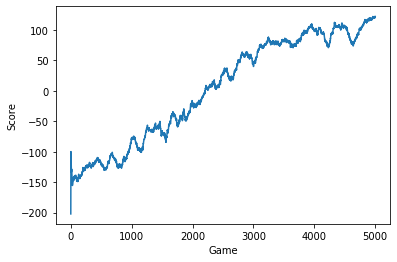

In [20]:
import gym 
import numpy as np
import matplotlib.pyplot as plt

def plotLearning(scores, filename, x=None, window=5):
    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-window):(t+1)])
    if x is None:
        x = [i for i in range(N)]
    plt.ylabel('Score')       
    plt.xlabel('Game')                     
    plt.plot(x, running_avg)
    plt.savefig(filename)

if __name__ == '__main__':
    
    agent = Agent(alpha=0.0005, ip_dims=8, n_actions=4)
    env = gym.make('LunarLander-v2')
    
    score_history = []
    num_episodes = 5000
    #env.reset()
    
    for i in range(num_episodes):
        done = False
        score = 0
        
        observation  =  env.reset()
        
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            agent.transition_state_matrix(observation, action, reward)
            observation = observation_
            score += reward
            
        score_history.append(score)
        
        _=agent.learn()
        
        print('episode: ', i, 'score: %.1f'%score, 'average score %.1f' % np.mean(score_history[max(0, i-100):(i+1)]))
        
    f_name = 'lunar_lander_keras.png'
    plotLearning(score_history, filename=f_name, window=100)